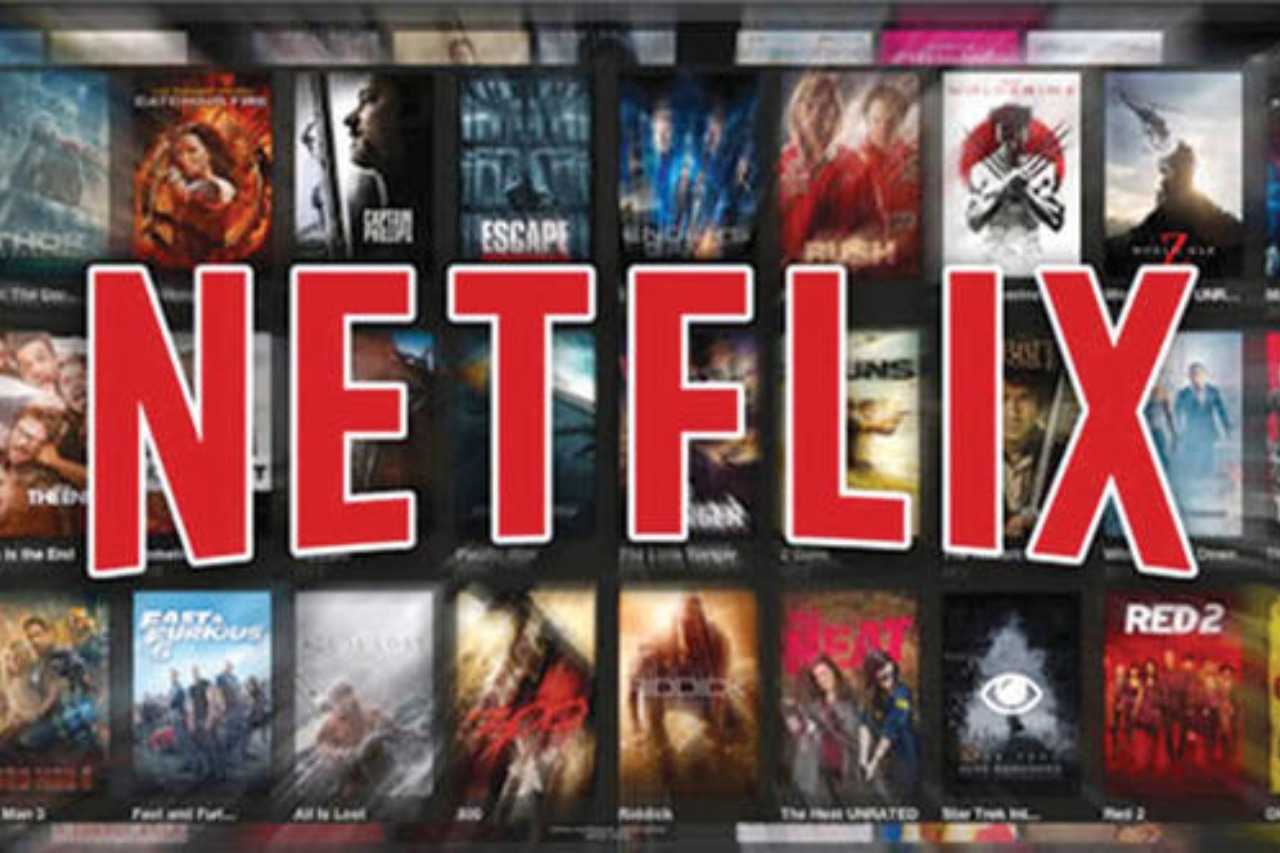

In [1]:
from IPython.display import Image
Image(filename=r"C:\Users\DELL\Downloads\netflix1.jpg",width=1000,height=100)

### Obtaining data & importing libraries 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
netflix=pd.read_csv(r"C:\Users\DELL\Desktop\Datasets\netflix_titles.csv")
netflix.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
netflix.shape

(7787, 12)

In [5]:
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [6]:
netflix.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [7]:
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

### Data Cleaning and Exploratory data analysis

#### Analysis of rating

In [8]:
netflix.groupby('rating').type.value_counts()  #Typewise rating distribution of netflix content

rating    type   
G         Movie        39
NC-17     Movie         3
NR        Movie        79
          TV Show       5
PG        Movie       247
PG-13     Movie       386
R         Movie       663
          TV Show       2
TV-14     Movie      1272
          TV Show     659
TV-G      Movie       111
          TV Show      83
TV-MA     Movie      1845
          TV Show    1018
TV-PG     Movie       505
          TV Show     301
TV-Y      TV Show     163
          Movie       117
TV-Y7     TV Show     176
          Movie        95
TV-Y7-FV  Movie         5
          TV Show       1
UR        Movie         5
Name: type, dtype: int64

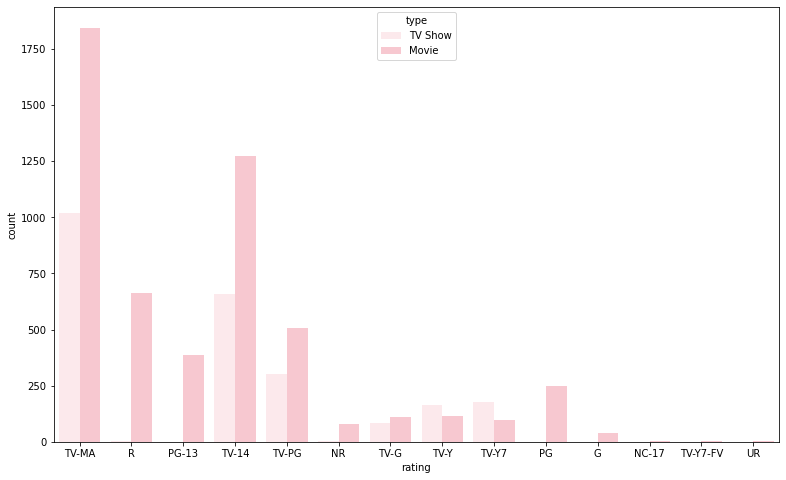

In [9]:
plt.figure(figsize=(13,8)) #Pltting the values obtained above
sns.countplot(netflix['rating'][:],hue=netflix['type'],color='Pink')

From the groupby classification above it can be seen that TV-MA is the rating obtained for maximum number of programs. So, we fill the missing values with the same.

From the graph and values obtained it can be seen that:
 TV-MA rated movies and TV Shows are highest in number. These are programs suitable for people above the age of 18.
 Next come movies and TV Shows rated TV 14 which suitable for viewers aged 14 and above.
 The third most common rating is TV-PG which come with suggestions of parental guidelines.

In [10]:
#Flling in the missing values of the column ratings with the most common value that is TV-MA.
netflix['rating'].fillna('TV-MA',inplace=True)

In [11]:
netflix['date_added'].fillna('1st December 2011',inplace=True) #Remove this and add on the basis of dates analysis

#### Analysis of type of content

2410 5377


Text(0.5, 1.0, 'Content type')

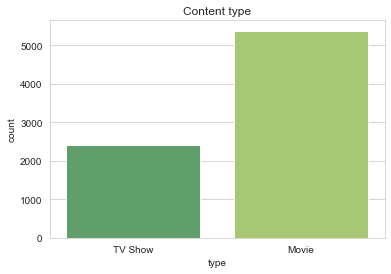

In [12]:
l=[] #Number of TV Shows
m=[] #Number of movies
for i in netflix['type']:
    if i=='TV Show':
        l.append(i)
    else:
        m.append(i)
print(len(l),len(m))

#Representation on plot
sns.set_style('whitegrid')
sns.countplot(netflix['type'],palette='summer')
plt.title('Content type')

The number of TV shows on the OTT platform is 2410 and movies is 5377 (More movies than TV shows)

#### Country wise analysis of availability of content

Top 10 movie creators:
country
United States     1850
India              852
United Kingdom     193
Canada             118
Egypt               89
Spain               89
Turkey              73
Philippines         70
France              69
Japan               69
Name: country, dtype: int64


Top 10 TV Show creators:
country
United States     705
United Kingdom    204
Japan             157
South Korea       147
India              71
Taiwan             68
Canada             59
Australia          46
France             46
Spain              45
Name: country, dtype: int64


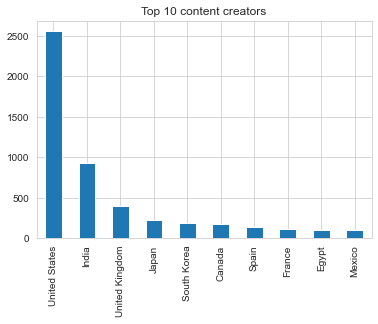

In [13]:
print('Top 10 movie creators:')
print(netflix.groupby('type').country.value_counts()['Movie'][:10])   #Top 10 movies creating countries(what is available on Netflix)
print('\n')
print('Top 10 TV Show creators:')
print(netflix.groupby('type').country.value_counts()['TV Show'][:10])  #Top 10 TV Shows creating countries

#Visualisation (Top 10 content creating countries())
netflix['country'].value_counts()[:10].plot(kind='bar')
plt.title('Top 10 content creators')
plt.show()

Top 5 countries when it comes to availability and creation of movies:- USA, India, UK, Cananda, Egypt

Top 5 countries when it comes to availability and creation of TV Shows:- USA, UK, Japan, South Korea, India

In [14]:
#Since most of the content is available and created in USA, so we fill the missing values of the country column with'USA'.
netflix['country'].fillna('United States',inplace=True)

#### Genre wise analysis of content

Documentaries                                       334
Stand-Up Comedy                                     321
Dramas, International Movies                        320
Comedies, Dramas, International Movies              243
Dramas, Independent Movies, International Movies    215
Kids' TV                                            205
Children & Family Movies                            177
Documentaries, International Movies                 172
Children & Family Movies, Comedies                  169
Comedies, International Movies                      161
Name: listed_in, dtype: int64


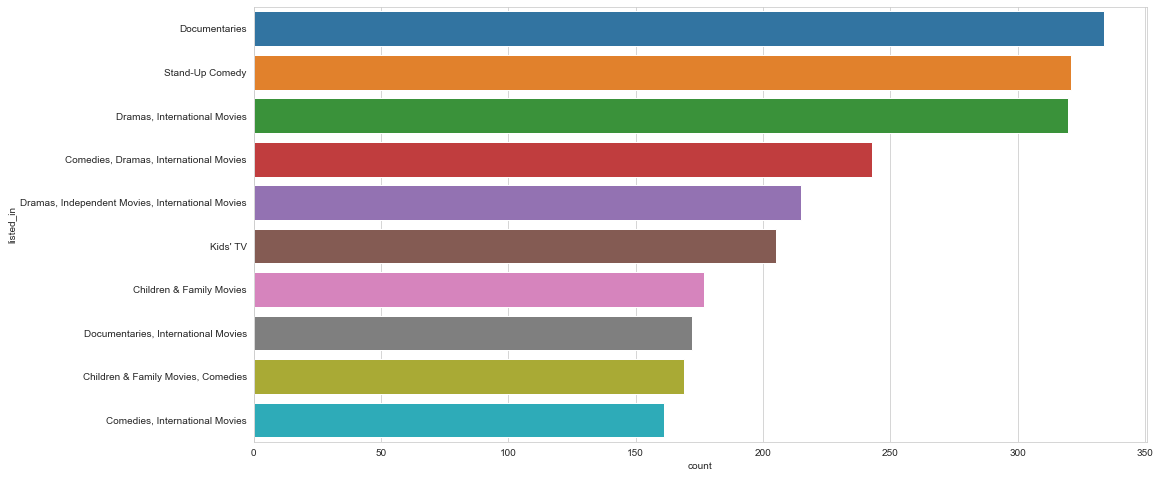

In [15]:
print(netflix['listed_in'].value_counts()[:10])  #Top 10 genres of all types of content (TV Shows & Movies) and the visual representation.

plt.figure(figsize=(16,8))  
sns.countplot(y=netflix['listed_in'],order=netflix['listed_in'].value_counts().index[:10])

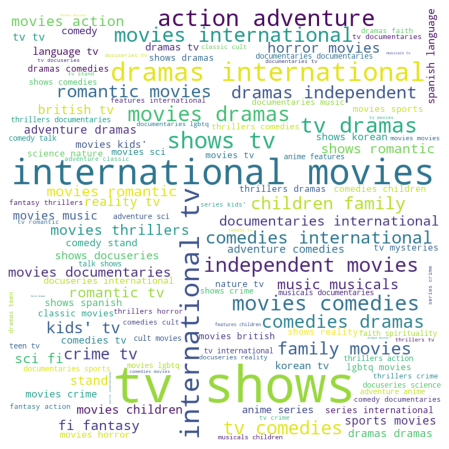

In [16]:
#Wordcloud - The word appearing larger in a wordcloud has higher frequency.

from wordcloud import WordCloud, STOPWORDS
wc=''
stopwords=set(STOPWORDS)
for j in netflix['listed_in']:
    tokens=j.split(',')

    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    wc =wc+ " ".join(tokens)+" "
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords).generate(wc)
plt.figure(figsize=(20,8))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

#### Release date/year analysis (Type of content available, old to new)

In [17]:
#Defining a function that categorises content on the basis of release_year

def release(release_date):
    if 1960<=release_date<=1990:
        return 'Very old'
    elif 1990<release_date<=2000:
        return 'Old'
    elif 2000<release_date<=2015:
        return 'Early 21st century'
    elif 2015<release_date<=2021:
        return 'New'
    else:
        return None
netflix['Movie_release_type']=netflix['release_year'].apply(release)

In [18]:
netflix.head()   #The new column called 'Movie_release_type' gets added 

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Movie_release_type
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,New
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,New
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Early 21st century
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",Early 21st century
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,Early 21st century


Movie_release_type  type   
Early 21st century  Movie      1820
                    TV Show     574
New                 Movie      3125
                    TV Show    1785
Old                 Movie       207
                    TV Show      32
Very old            Movie       201
                    TV Show      17
Name: type, dtype: int64


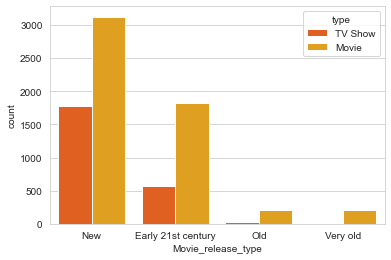

In [19]:
print(netflix.groupby('Movie_release_type').type.value_counts())
sns.countplot(netflix['Movie_release_type'],hue=netflix['type'],palette='autumn')

Most of the content available on Netflix has been released in the period 2000-2021.
Not many movies by the Gen Z population are available on the OTT platform. If we see the graph from close, it can be seen that the concept of TV Shows was not prominent before 2000. It started gaining some popularity in the first decade on 21st century.

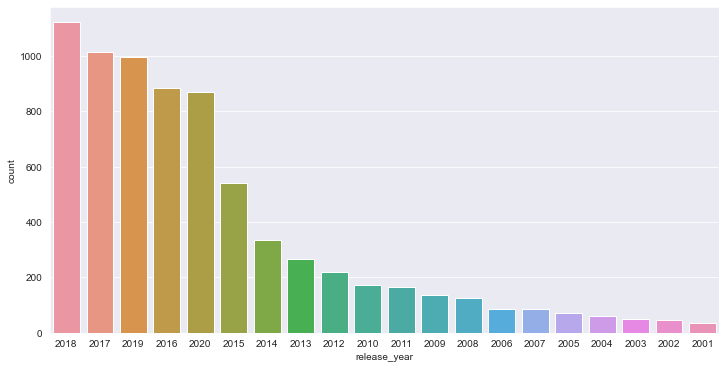

In [20]:
plt.figure(figsize=(12,6))  #Counting the total number of movie & TV Shows based on release year.
sns.set_style('darkgrid')
sns.countplot(x='release_year',data=netflix,order=netflix['release_year'].value_counts(ascending=False).index[:20])

Uploading of movies and TV Shows released every year has been increasing over the years.

#### 10 most oldest movies on Netflix

In [73]:
a=[]
b=[]
df=netflix['release_year'].sort_values(ascending=True)[:10].to_frame()
for i in df.index:
    a.append(netflix['release_year'].iloc[i])   #Using iloc to obtain corresponding values of a column using the value's index.
    b.append(netflix['title'].iloc[i])
df2=pd.DataFrame(data={'Release year':a,'Title':b},index=[1,2,3,4,5,6,7,8,9,10])   #Creating a dataframe from the values obtained.
df2

,Release year,Title
1,1925,Pioneers: First Women Filmmakers*
2,1942,The Battle of Midway
3,1942,Prelude to War
4,1943,WWII: Report from the Aleutians
5,1943,Undercover: How to Operate Behind Enemy Lines
6,1943,Why We Fight: The Battle of Russia
7,1944,Tunisian Victory
8,1944,The Negro Soldier
9,1944,The Memphis Belle: A Story of a\nFlying Fortress
10,1945,San Pietro


#### 10 most new movies on Netflix

In [74]:
l=[]
m=[]
df=netflix['release_year'].sort_values(ascending=False)[:10].to_frame()
for i in df.index:
    l.append(netflix['release_year'].iloc[i])   #Using iloc to obtain corresponding values of a column using the value's index.
    m.append(netflix['title'].iloc[i])
df3=pd.DataFrame(data={'Release year':l,'Title':m},index=[1,2,3,4,5,6,7,8,9,10])
df3

,Release year,Title
1,2021,Night Stalker: The Hunt for a Serial Killer
2,2021,Charming
3,2021,Bling Empire
4,2021,Lupin
5,2021,Monarca
6,2021,"Crack: Cocaine, Corruption & Conspiracy"
7,2021,Carmen Sandiego
8,2021,Stuck Apart
9,2021,History of Swear Words
10,2021,Dream Home Makeover


#### Duration Analysis of Movies & TV Shows

In [21]:
netflix.groupby('type').duration.value_counts()

type     duration  
Movie    90 min        136
         93 min        131
         91 min        125
         94 min        125
         95 min        119
                      ... 
TV Show  11 Seasons      3
         12 Seasons      2
         13 Seasons      2
         15 Seasons      2
         16 Seasons      1
Name: duration, Length: 216, dtype: int64

Text(0.5, 1.0, 'Duration distribution of TV Shows on netflix (no. of seasons)')

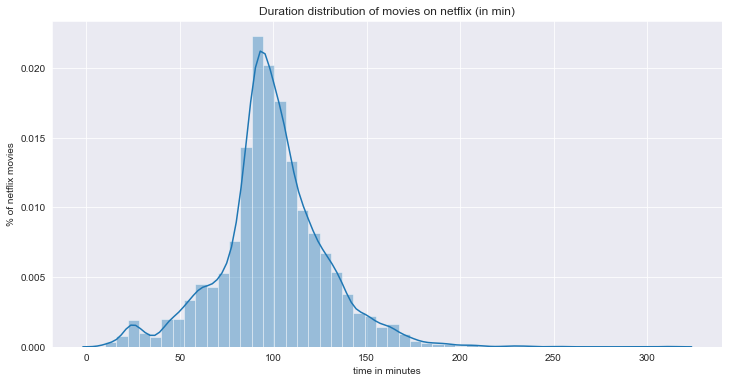

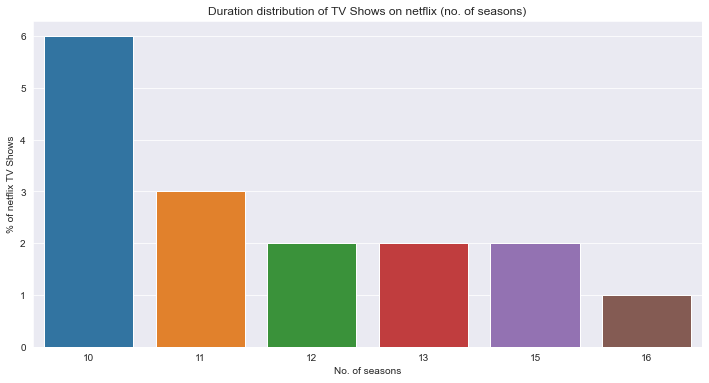

In [22]:
l=[]
m=[]
for i in netflix['duration']:
    if i[3:6]=='min':
        l.append(int(i[0:2]))
    elif i[4:7]=='min':
        l.append(int(i[0:3]))
    elif i[3:10]=='Seasons':
        m.append(int(i[0:2]))
        
#Visualisation (duration of movies in minutes)     
plt.figure(figsize=(12,6))
sns.set_style('darkgrid')
sns.distplot(l)
plt.xlabel('time in minutes')
plt.ylabel('% of netflix movies')
plt.title('Duration distribution of movies on netflix (in min)')

#Visualisation (number of seasons)
plt.figure(figsize=(12,6))
sns.countplot(m)
plt.xlabel('No. of seasons')
plt.ylabel('% of netflix TV Shows')
plt.title('Duration distribution of TV Shows on netflix (no. of seasons)')

Duration of most of the movies is less than 100 minutes (somewhere between 90-92 minutes) whereas most of the TV Shows have 10 seasons.

#### Directors

Text(0.5, 1.0, 'Top 10 movie directors (highest no. of movies on Netflix)')

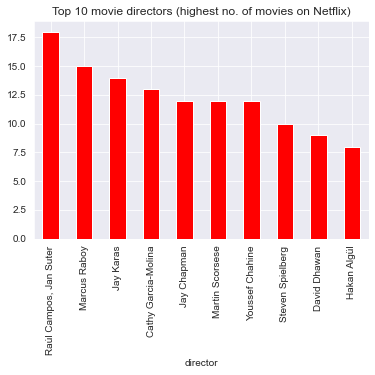

In [23]:
netflix.groupby('type').director.value_counts()['Movie'][:10].plot(kind='bar',color='Red')
plt.title('Top 10 movie directors (highest no. of movies on Netflix)')

#This plot is not based on rating of movies but on the number of movies of the respective directors available on netflix.

Movie directors with most number of MOVIES on Netflix: Raul Campos, Jan Suter

Text(0.5, 1.0, 'Top 10 TV Shows directors (highest no. of shows on Netflix)')

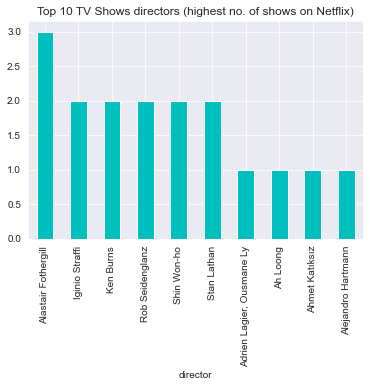

In [24]:
netflix.groupby('type').director.value_counts()['TV Show'][:10].plot(kind='bar',color='c')
plt.title('Top 10 TV Shows directors (highest no. of shows on Netflix)') 

#This plot is not based on rating of movies but on the number of movies of the respective directors available on netflix.

TV Shows director with most number of TV SHOWS on Netflix: Alastair Fothergill

#### Cast

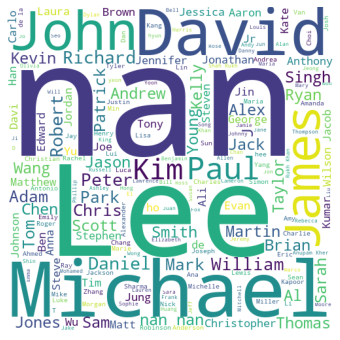

In [36]:
#Wordcloud
netflix['cast'].fillna(' ')   #Filling missing alues with empty string
from PIL import Image
actors=''
stopwords=set(STOPWORDS)
for i in netflix['cast']:
    i=str(i)
    tokens=i.split(',')
    actors=actors+' '.join(tokens)+' '
    
wordcloud=WordCloud(stopwords=stopwords,height=500,width=500,background_color='white')
wc=wordcloud.generate(actors)
plt.figure(figsize=(16,6))
plt.axis('off')
plt.imshow(wc)
plt.show()

The strings appearing larger in a word cloud have greater frequency in the series.a
The names of the actors appearing larger in the word cloud above have acted in most number of movies present in Netflix.

## Movie Recommender system

Content based movie recommendations can be given by considering the following factors given in the dataframe:

1. Movie description 
2. Director of the movie
3. Cast in the movie
4. Category in which the movie has been listed 

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

In [27]:
#A function called combined_features is created which is a column that is a merge of the columns description,director,cast and listed_in.

def combined_features(row):
    return str(row['cast'])+' '+str(row['director'])+' '+str(row['description'])+' '+str(row['listed_in'])


netflix['combined_features']=netflix.apply(combined_features,axis=1)  #Adding the combined_features column in the original dataframe.

netflix['combined_features'].fillna('')   #Null values are replaced with the an empty string

netflix['combined_features'][1]

'Demián Bichir, Héctor Bonilla, Oscar Serrano, Azalia Ortiz, Octavio Michel, Carmen Beato Jorge Michel Grau After a devastating earthquake hits Mexico City, trapped survivors from all walks of life wait to be rescued while trying desperately to stay alive. Dramas, International Movies'

In [28]:
netflix.head(3) #The column combined_features gets added in the original dataframe.

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Movie_release_type,combined_features
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,New,"João Miguel, Bianca Comparato, Michel Gomes, R..."
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,New,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ..."
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Early 21st century,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ..."


In [29]:
tfidf_matrix = tfidf.fit_transform(netflix['combined_features'])  

tfidf_matrix.shape

(7787, 46350)

In [30]:
from sklearn.metrics.pairwise import linear_kernel
cosine_similarity = linear_kernel(tfidf_matrix, tfidf_matrix)

In [31]:
indices = pd.Series(netflix.index, index=netflix['title']).drop_duplicates()  #Dropping duplicate values

In [32]:
def get_recommendations(title, cosine_sim=cosine_similarity):
    index = indices[title]

    # Getting the similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_similarity[index]))

    # Sorting the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Getting the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Getting the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return netflix['title'].iloc[movie_indices]

In [33]:
#Making some predictions to test our model.
get_recommendations('3%')   

421                             All The Reasons To Forget
3690    Lo que la verdad esconde: El caso Asunta (Oper...
6958                                 The Umbrella Academy
680                                      Back with the Ex
4923                                               Powder
6782                                The Princess Weiyoung
4059                                        Mexico Diseña
3924                                      Mar de Plástico
3014                                Inside The Freemasons
4104                                   Million Pound Menu
Name: title, dtype: object

In [34]:
get_recommendations('Sherlock Holmes')

5775             Spy Kids 3: Game Over
6918                          The Take
6602                 The Little Prince
960                         Black Rose
639     Awake: The Million Dollar Game
2487         Good Night, and Good Luck
6217              The Christmas Candle
2502                      Gosford Park
1919                 Eddie Murphy: Raw
7774                            Zodiac
Name: title, dtype: object